In [213]:
# General imports
import json 
import glob
import math
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as md
import numpy as np # linear algebra
import seaborn as sns
import pytz

# Sklearn imports
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.cluster import KMeans #The k-means algorithm
from sklearn import tree
from sklearn.ensemble import RandomForestRegressor
#Model Validation & Model Tuning
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score

# Machine Learning 
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
# from lightgbm import LGBMClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score


In [214]:
df = pd.read_csv('data/data.csv')
df = df.drop(["Tijdstempel"] , axis=1)

In [215]:
df.columns = ['how_survey_across', 'digital_skill_level', 'digital_privacy_aware', 'terms_conditions', 'digital_privacy_aware_score', 'data_protection', 'how_protection', 'data_deletion', 'worst_case_scenario', 'age', 'gender', 'born', 'education', 'pet', 'device', 'student', 'source_income', 'income', 'living_situation', 'screen_time', 'social_media_activity', 'main_social_media']

In [216]:
df.head(3)

,how_survey_across,digital_skill_level,digital_privacy_aware,terms_conditions,digital_privacy_aware_score,data_protection,how_protection,data_deletion,worst_case_scenario,age,...,education,pet,device,student,source_income,income,living_situation,screen_time,social_media_activity,main_social_media
0,A friend sent it to me,Always online,Yes,No,8,Yes,VPN;Deleting cookies,Not sure,Sold,21,...,VWO,Cat,iPhone,Yes,Student loan,700.0,Living with parents,6,3.0,Tiktok
1,NaN,Always online,No,No,4,No,I dont,Not sure,Ads being sold,20,...,HAVO,Dog,Samsung smartphone,Yes,Student loan,500.0,Living with parents,8,4.0,Tiktok
2,A friend sent it to me,Digital native,Yes,Sometimes,7,Yes,VPN;Different accounts;Deleting cookies,Not sure,Getting in the wrong hands,22,...,HBO-Bachelor,Cat,iPhone,No,Job,2400.0,Renting a room,7,2.0,Reddit


In [217]:
df.describe(include='all')

,how_survey_across,digital_skill_level,digital_privacy_aware,terms_conditions,digital_privacy_aware_score,data_protection,how_protection,data_deletion,worst_case_scenario,age,...,education,pet,device,student,source_income,income,living_situation,screen_time,social_media_activity,main_social_media
count,63,64,64,60,64.000000,64,56,64,52,64.000000,...,64,64,64,64,64,62.000000,64,64.000000,63.000000,64
unique,3,5,2,3,NaN,3,25,3,48,NaN,...,9,2,6,2,6,NaN,5,NaN,NaN,7
top,Whatsapp,Always online,Yes,No,NaN,No,Using services without an account,Not sure,Leaks,NaN,...,HBO-Bachelor,Dog,iPhone,No,Job,NaN,Living with parents,NaN,NaN,Tiktok
freq,26,27,39,46,NaN,27,8,29,3,NaN,...,17,32,27,44,42,NaN,22,NaN,NaN,22
mean,NaN,NaN,NaN,NaN,5.500000,NaN,NaN,NaN,NaN,21.718750,...,NaN,NaN,NaN,NaN,NaN,1755.645161,NaN,5.765625,2.095238,NaN
std,NaN,NaN,NaN,NaN,2.281743,NaN,NaN,NaN,NaN,2.603226,...,NaN,NaN,NaN,NaN,NaN,986.054601,NaN,2.549461,1.027278,NaN
min,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,18.000000,...,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,2.000000,1.000000,NaN
25%,NaN,NaN,NaN,NaN,4.000000,NaN,NaN,NaN,NaN,19.750000,...,NaN,NaN,NaN,NaN,NaN,800.000000,NaN,4.000000,1.000000,NaN
50%,NaN,NaN,NaN,NaN,6.000000,NaN,NaN,NaN,NaN,21.000000,...,NaN,NaN,NaN,NaN,NaN,1800.000000,NaN,5.000000,2.000000,NaN
75%,NaN,NaN,NaN,NaN,7.000000,NaN,NaN,NaN,NaN,23.250000,...,NaN,NaN,NaN,NaN,NaN,2575.000000,NaN,8.000000,3.000000,NaN


In [218]:
# create a dataframe with numerical values
df_numerical = df.copy()
# fill NaN values with 0
df_numerical = df_numerical.fillna(0)
# convert categorical values to numerical values
df_numerical['how_survey_across'] = df_numerical['how_survey_across'].astype('category').cat.codes
df_numerical['digital_skill_level'] = df_numerical['digital_skill_level'].astype('category').cat.codes
df_numerical['digital_privacy_aware'] = df_numerical['digital_privacy_aware'].astype('category').cat.codes
df_numerical['terms_conditions'] = df_numerical['terms_conditions'].astype('category').cat.codes
df_numerical['data_protection'] = df_numerical['data_protection'].astype('category').cat.codes
df_numerical['how_protection'] = df_numerical['how_protection'].astype('category').cat.codes
df_numerical['data_deletion'] = df_numerical['data_deletion'].astype('category').cat.codes
df_numerical['education'] = df_numerical['education'].astype('category').cat.codes
df_numerical['pet'] = df_numerical['pet'].astype('category').cat.codes
df_numerical['student'] = df_numerical['student'].astype('category').cat.codes
df_numerical['living_situation'] = df_numerical['living_situation'].astype('category').cat.codes
df_numerical['worst_case_scenario'] = df_numerical['worst_case_scenario'].astype('category').cat.codes
df_numerical.head(3)

,how_survey_across,digital_skill_level,digital_privacy_aware,terms_conditions,digital_privacy_aware_score,data_protection,how_protection,data_deletion,worst_case_scenario,age,...,education,pet,device,student,source_income,income,living_situation,screen_time,social_media_activity,main_social_media
0,1,0,1,1,8,2,17,1,24,21,...,6,0,iPhone,1,Student loan,700.0,0,6,3.0,Tiktok
1,0,0,0,1,4,0,11,1,1,20,...,0,1,Samsung smartphone,1,Student loan,500.0,0,8,4.0,Tiktok
2,1,2,1,2,7,2,19,1,6,22,...,1,0,iPhone,0,Job,2400.0,3,7,2.0,Reddit


In [219]:
df_numerical.describe().T

,count,mean,std,min,25%,50%,75%,max
how_survey_across,64.0,2.031250,0.907967,0.0,1.00,2.0,3.00,3.0
digital_skill_level,64.0,1.484375,1.490629,0.0,0.00,2.0,2.00,4.0
digital_privacy_aware,64.0,0.609375,0.491747,0.0,0.00,1.0,1.00,1.0
terms_conditions,64.0,1.187500,0.587570,0.0,1.00,1.0,1.00,3.0
digital_privacy_aware_score,64.0,5.500000,2.281743,1.0,4.00,6.0,7.00,10.0
data_protection,64.0,0.906250,0.867742,0.0,0.00,1.0,2.00,2.0
how_protection,64.0,11.906250,7.539775,0.0,4.00,14.5,17.00,25.0
data_deletion,64.0,0.796875,0.716687,0.0,0.00,1.0,1.00,2.0
worst_case_scenario,64.0,19.328125,15.506327,0.0,4.75,18.5,32.25,48.0
age,64.0,21.718750,2.603226,18.0,19.75,21.0,23.25,30.0


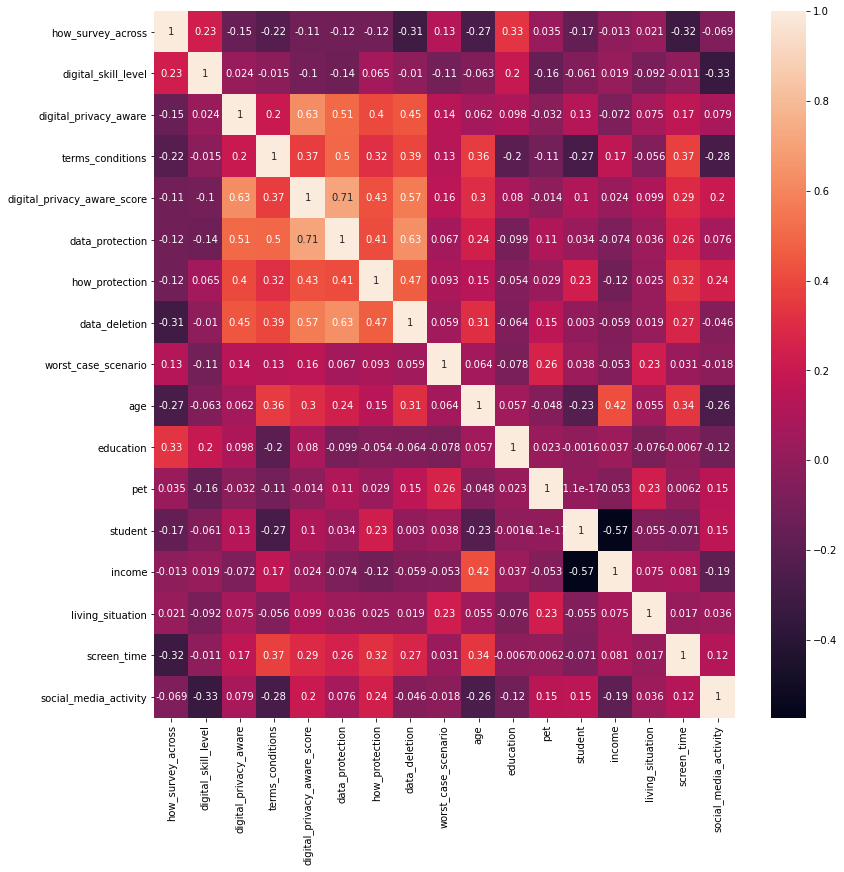

In [220]:
correlation_mat = df_numerical.corr()
correlation_mat
fig, ax = plt.subplots(figsize=(13,13))
sns.heatmap(correlation_mat, annot = True, xticklabels=correlation_mat.columns, yticklabels=correlation_mat.columns, ax=ax)
plt.show()

In [221]:
df.isnull().sum()
# fill null values with 0
df= df.fillna(0)

We must confirm that our dataset has no missing values.

We can write an Assert statement to verify this.

We can use an assert statement to programmatically check that no missing, unexpected 0 or negative values are present.

This gives us confidence that our code is running properly.

Assert statement will return nothing if the value being tested is true and will throw an AssertionError if the value is false.

Asserts

assert 1 == 1 (return Nothing if the value is True)

assert 1 == 2 (return AssertionError if the value is False)

In [222]:
assert pd.notnull(df).all().all()

The above command does not throw any error. Hence, it is confirmed that there are no missing or negative values in the dataset.

All the values are greater than or equal to zero excluding character values.

In [223]:
categorical = [var for var in df.columns if df[var].dtype=='O']

print('There are {} categorical variables\n'.format(len(categorical)))

print('The categorical variables are :\n\n', categorical)

There are 17 categorical variables

The categorical variables are :

 ['how_survey_across', 'digital_skill_level', 'digital_privacy_aware', 'terms_conditions', 'data_protection', 'how_protection', 'data_deletion', 'worst_case_scenario', 'gender', 'born', 'education', 'pet', 'device', 'student', 'source_income', 'living_situation', 'main_social_media']


In [224]:
df[categorical].head()

,how_survey_across,digital_skill_level,digital_privacy_aware,terms_conditions,data_protection,how_protection,data_deletion,worst_case_scenario,gender,born,education,pet,device,student,source_income,living_situation,main_social_media
0,A friend sent it to me,Always online,Yes,No,Yes,VPN;Deleting cookies,Not sure,Sold,Male,Utrecht,VWO,Cat,iPhone,Yes,Student loan,Living with parents,Tiktok
1,0,Always online,No,No,No,I dont,Not sure,Ads being sold,Female,Noord-Holland,HAVO,Dog,Samsung smartphone,Yes,Student loan,Living with parents,Tiktok
2,A friend sent it to me,Digital native,Yes,Sometimes,Yes,VPN;Different accounts;Deleting cookies,Not sure,Getting in the wrong hands,Male,Noord-Holland,HBO-Bachelor,Cat,iPhone,No,Job,Renting a room,Reddit
3,Whatsapp,Always online,No,No,Not sure,Deleting cookies;Sharing accounts;Using servic...,Not sure,Facebook,Male,Utrecht,WO-Master,Cat,Other Android Phone,No,Job,Living with parents,Twitter
4,Whatsapp,Never online,Yes,Sometimes,Yes,VPN;Different accounts;Deleting cookies;Limite...,Not sure,My data getting in the hands of the chinese go...,Male,Utrecht,WO-Bachelor,Dog,iPhone,Yes,Student loan,Living with parents,Reddit


### Summary of categorical variables
There are 17 categorical variables in the dataset.

The categorical variables are given by 'how_survey_across', 'digital_skill_level', 'digital_privacy_aware', 'terms_conditions', 'data_protection', 'how_protection', 'data_deletion', 'worst_case_scenario', 'gender', 'born', 'education', 'pet', 'device', 'student', 'source_income', 'living_situation', 'main_social_media'.

income is the target variable

In [225]:
df['income'].isnull().sum()

0

Check if there are missing values, which there are not.

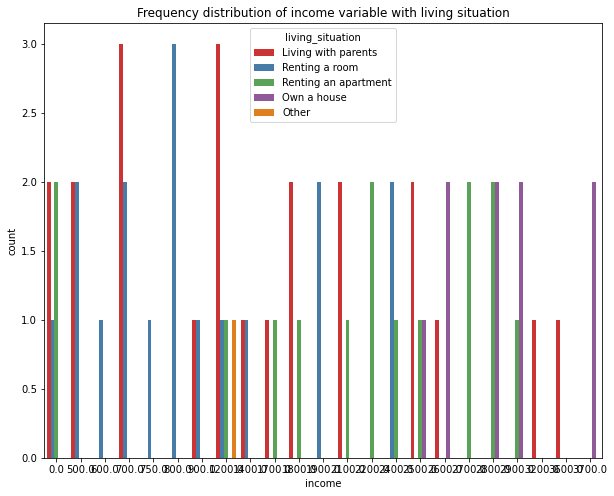

In [226]:
f, ax = plt.subplots(figsize=(10, 8))
ax = sns.countplot(x="income", hue="living_situation", data=df, palette="Set1")
ax.set_title("Frequency distribution of income variable with living situation")
plt.show()

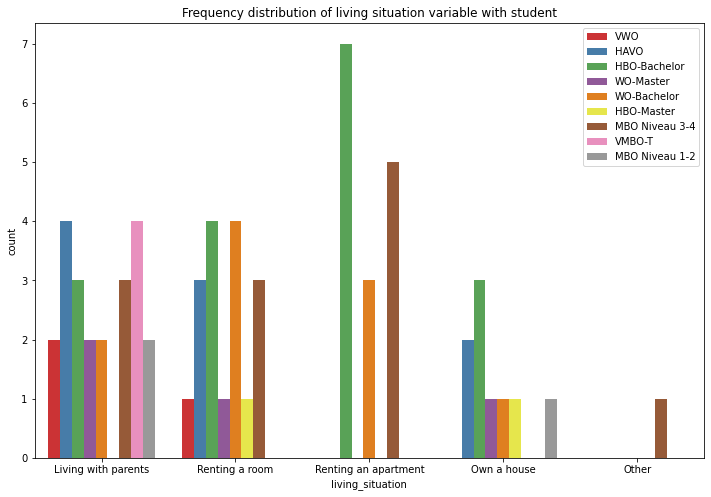

In [227]:
f, ax = plt.subplots(figsize=(12, 8))
ax = sns.countplot(x="living_situation", hue="education", data=df, palette="Set1")
ax.set_title("Frequency distribution of living situation variable with student")
ax.legend(loc='upper right')
plt.show()

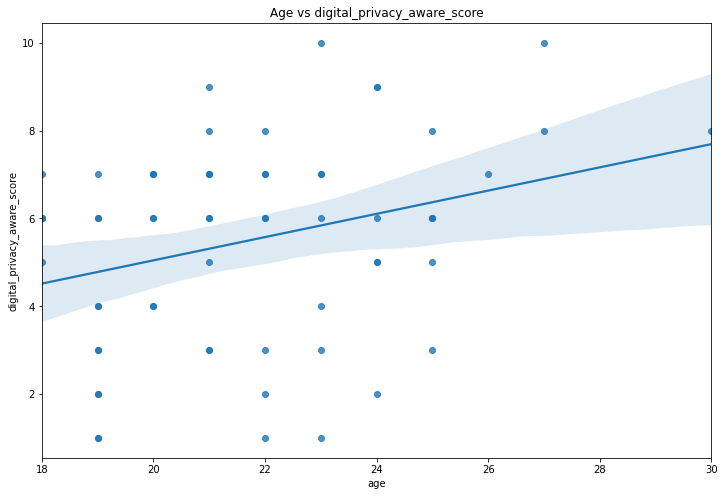

In [228]:
# make a plot of age vs digital_privacy_aware_score
# f, ax = plt.subplots(figsize=(12, 8))
# ax = sns.scatterplot(x="age", y="digital_privacy_aware_score", hue="education", data=df, palette="Set1")
# ax.set_title("Age vs digital_privacy_aware_score")
# plt.show()

# make a linear plot of age vs digital_privacy_aware_score
f, ax = plt.subplots(figsize=(12, 8))
ax = sns.regplot(x="age", y="digital_privacy_aware_score", data=df)
ax.set_title("Age vs digital_privacy_aware_score")
plt.show()




In [229]:
# only select rows that have digital_privacy_aware == "Yes"
df_digital_privacy_aware = df[df['digital_privacy_aware'] == "Yes"]
df_digital_privacy_aware["data_protection"].value_counts()



Yes         21
No          11
Not sure     7
Name: data_protection, dtype: int64

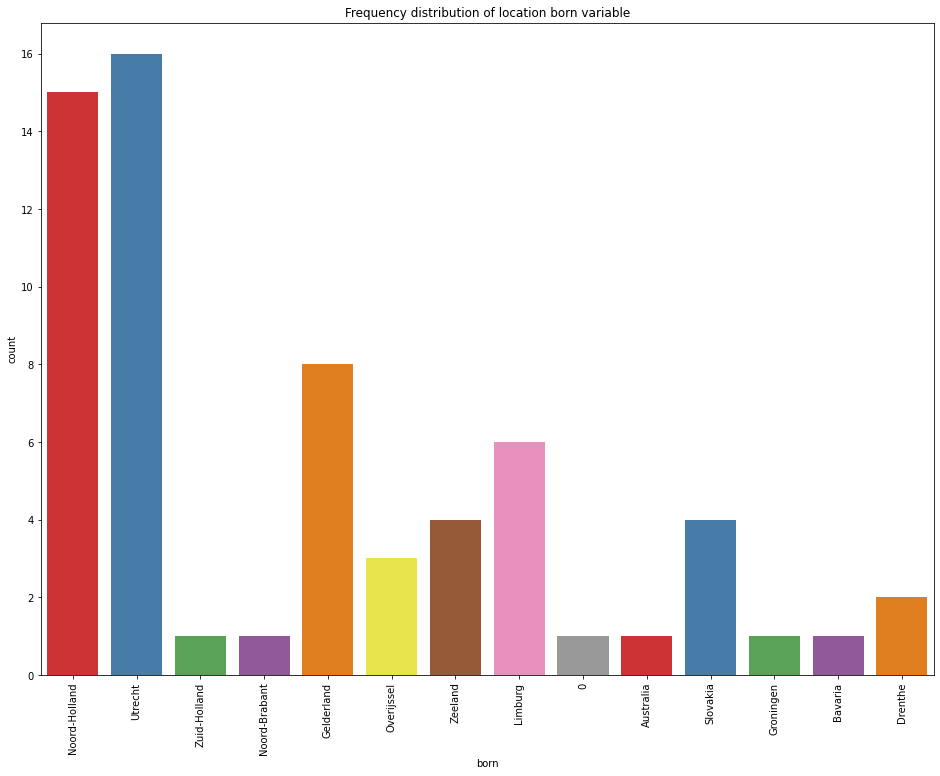

In [230]:
# visualize frequency distribution of `native_country` variable

f, ax = plt.subplots(figsize=(16, 12))
ax = sns.countplot(x="born", data=df, palette="Set1")
ax.set_title("Frequency distribution of location born variable")
ax.set_xticklabels(df.born.value_counts().index, rotation=90)
plt.show()

/Users/danielvanderschuur/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


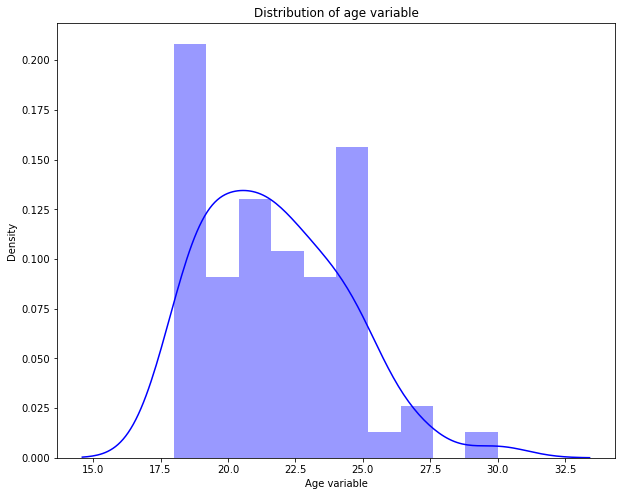

In [231]:
f, ax = plt.subplots(figsize=(10,8))
x = df['age']
x = pd.Series(x, name="Age variable")
ax = sns.distplot(x, bins=10, color='blue')
ax.set_title("Distribution of age variable")
plt.show()

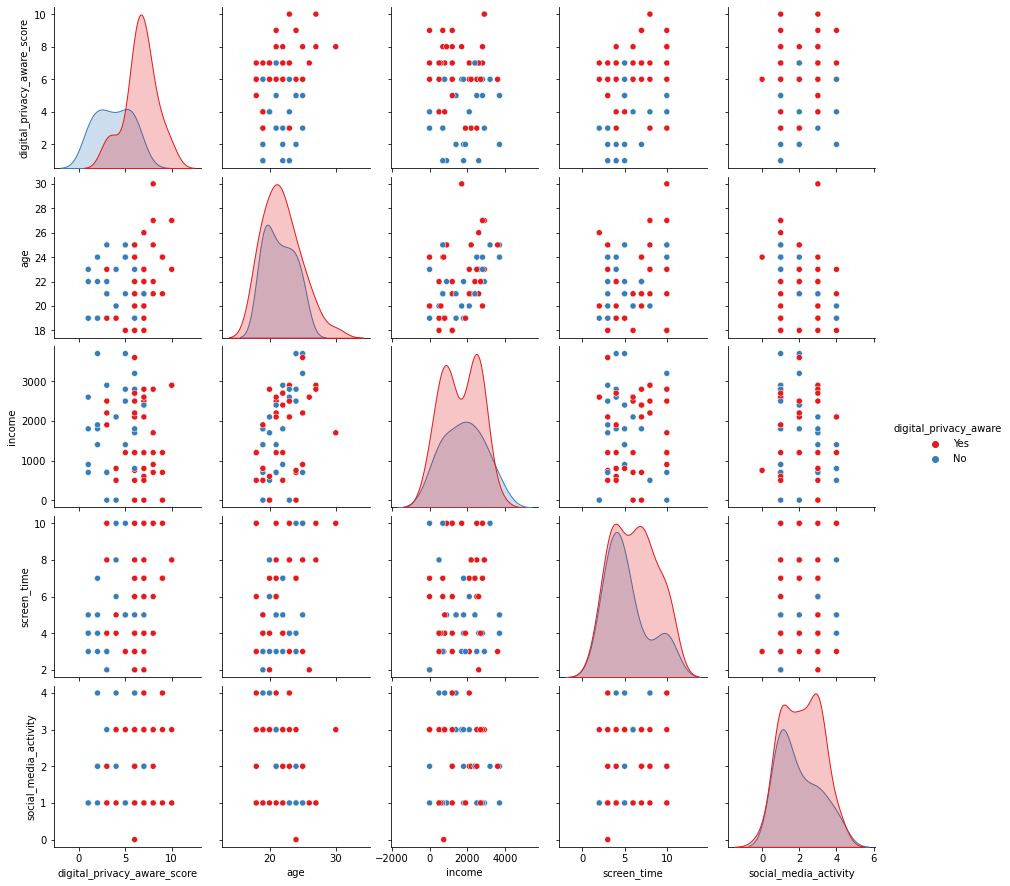

In [232]:
sns.pairplot(df, hue="digital_privacy_aware", palette="Set1")
plt.show()

In [233]:
X = df.drop(['education'], axis=1)

y = df['education']

In [234]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [235]:
# check the shape of X_train and X_test

X_train.shape, X_test.shape

((44, 21), (20, 21))

In [236]:
categorical = [col for col in X_train.columns if X_train[col].dtypes == 'O']

categorical

['how_survey_across',
 'digital_skill_level',
 'digital_privacy_aware',
 'terms_conditions',
 'data_protection',
 'how_protection',
 'data_deletion',
 'worst_case_scenario',
 'gender',
 'born',
 'pet',
 'device',
 'student',
 'source_income',
 'living_situation',
 'main_social_media']

In [237]:
numerical = [col for col in X_train.columns if X_train[col].dtypes != 'O']

numerical

['digital_privacy_aware_score',
 'age',
 'income',
 'screen_time',
 'social_media_activity']

In [238]:

X_train[categorical].isnull().mean()

how_survey_across        0.0
digital_skill_level      0.0
digital_privacy_aware    0.0
terms_conditions         0.0
data_protection          0.0
how_protection           0.0
data_deletion            0.0
worst_case_scenario      0.0
gender                   0.0
born                     0.0
pet                      0.0
device                   0.0
student                  0.0
source_income            0.0
living_situation         0.0
main_social_media        0.0
dtype: float64

In [239]:
for col in categorical:
    if X_train[col].isnull().mean()>0:
        print(col, (X_train[col].isnull().mean()))

In [240]:
X_train[categorical].isnull().sum()

how_survey_across        0
digital_skill_level      0
digital_privacy_aware    0
terms_conditions         0
data_protection          0
how_protection           0
data_deletion            0
worst_case_scenario      0
gender                   0
born                     0
pet                      0
device                   0
student                  0
source_income            0
living_situation         0
main_social_media        0
dtype: int64

In [241]:
# check missing values in categorical variables in X_test

X_test[categorical].isnull().sum()

how_survey_across        0
digital_skill_level      0
digital_privacy_aware    0
terms_conditions         0
data_protection          0
how_protection           0
data_deletion            0
worst_case_scenario      0
gender                   0
born                     0
pet                      0
device                   0
student                  0
source_income            0
living_situation         0
main_social_media        0
dtype: int64

In [242]:
X_train.isnull().sum()

how_survey_across              0
digital_skill_level            0
digital_privacy_aware          0
terms_conditions               0
digital_privacy_aware_score    0
data_protection                0
how_protection                 0
data_deletion                  0
worst_case_scenario            0
age                            0
gender                         0
born                           0
pet                            0
device                         0
student                        0
source_income                  0
income                         0
living_situation               0
screen_time                    0
social_media_activity          0
main_social_media              0
dtype: int64

In [243]:
X_test.isnull().sum()

how_survey_across              0
digital_skill_level            0
digital_privacy_aware          0
terms_conditions               0
digital_privacy_aware_score    0
data_protection                0
how_protection                 0
data_deletion                  0
worst_case_scenario            0
age                            0
gender                         0
born                           0
pet                            0
device                         0
student                        0
source_income                  0
income                         0
living_situation               0
screen_time                    0
social_media_activity          0
main_social_media              0
dtype: int64

In [244]:
# preview categorical variables in X_train

X_train[categorical].head()

,how_survey_across,digital_skill_level,digital_privacy_aware,terms_conditions,data_protection,how_protection,data_deletion,worst_case_scenario,gender,born,pet,device,student,source_income,living_situation,main_social_media
30,Social media,Always online,Yes,Sometimes,Yes,Different accounts;Deleting cookies;Sharing ac...,Yes,0,Female,Zeeland,Cat,iPhone,No,Job,Own a house,Twitter
7,Whatsapp,Rarely online,Yes,No,Not sure,VPN;Deleting cookies,Yes,It gets used in a data base,Male,Utrecht,Dog,iPhone,No,Job,Living with parents,Linkedin
14,Social media,Rarely online,Yes,No,No,Different accounts;Deleting cookies,Not sure,0,Female,Zuid-Holland,Cat,Windows PC,No,Job,Living with parents,Instagram
27,Whatsapp,Rarely online,No,No,No,Sharing accounts,No,It gets stolen,Male,Utrecht,Cat,Other Android Phone,No,Job,Own a house,Reddit
63,Social media,Never online,Yes,No,No,Sharing accounts,Not sure,0,Male,Zuid-Holland,Dog,Samsung smartphone,No,Job,Renting a room,Twitter


In [245]:
# import category encoders

import category_encoders as ce

In [246]:
# encode categorical variables with one-hot encoding

encoder = ce.OneHotEncoder(cols=['how_survey_across', 'digital_skill_level', 'digital_privacy_aware', 'terms_conditions', 'data_protection', 'how_protection', 'data_deletion', 'worst_case_scenario', 'gender', 'born', 'pet', 'device', 'student', 'source_income', 'living_situation', 'main_social_media'])

X_train = encoder.fit_transform(X_train)
X = encoder.transform(X)
X_test = encoder.transform(X_test)

In [247]:
X_train.shape

(44, 126)

In [248]:
X_test.head()

,how_survey_across_1,how_survey_across_2,how_survey_across_3,how_survey_across_4,digital_skill_level_1,digital_skill_level_2,digital_skill_level_3,digital_skill_level_4,digital_skill_level_5,digital_privacy_aware_1,...,living_situation_4,screen_time,social_media_activity,main_social_media_1,main_social_media_2,main_social_media_3,main_social_media_4,main_social_media_5,main_social_media_6,main_social_media_7
45,0,1,0,0,0,1,0,0,0,0,...,0,4,1.0,1,0,0,0,0,0,0
29,0,0,1,0,0,0,0,1,0,1,...,0,3,2.0,0,0,1,0,0,0,0
43,1,0,0,0,0,0,0,1,0,1,...,0,6,3.0,0,0,0,0,1,0,0
61,1,0,0,0,0,0,1,0,0,1,...,0,3,1.0,1,0,0,0,0,0,0
34,1,0,0,0,0,1,0,0,0,0,...,0,3,1.0,0,0,0,0,1,0,0


In [249]:
X_test.shape

(20, 126)

In [250]:
cols = X_train.columns

In [251]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()

X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)

In [252]:
X_train = pd.DataFrame(X_train, columns=[cols])

In [253]:
X_test = pd.DataFrame(X_test, columns=[cols])

In [286]:
# import Random Forest classifier

from sklearn.ensemble import RandomForestClassifier



# instantiate the classifier 

rfc = RandomForestClassifier(random_state=0 , n_estimators=100)



# fit the model

rfc.fit(X_train, y_train)



# Predict the Test set results

y_pred = rfc.predict(X_test)



# Check accuracy score 

from sklearn.metrics import accuracy_score

print('Model accuracy score with 10 decision-trees : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with 10 decision-trees : 0.3500


/Users/danielvanderschuur/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
/Users/danielvanderschuur/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


In [287]:
# instantiate the classifier with n_estimators = 100

rfc_100 = RandomForestClassifier(n_estimators=100, random_state=0)



# fit the model to the training set

rfc_100.fit(X_train, y_train)



# Predict on the test set results

y_pred_100 = rfc_100.predict(X_test)



# Check accuracy score 

print('Model accuracy score with 100 decision-trees : {0:0.4f}'. format(accuracy_score(y_test, y_pred_100)))

/Users/danielvanderschuur/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


Model accuracy score with 100 decision-trees : 0.3500


/Users/danielvanderschuur/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


In [288]:
clf = DecisionTreeClassifier(random_state=0)


# fit the model to the training set

clf.fit(X_train, y_train)

/Users/danielvanderschuur/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


DecisionTreeClassifier(random_state=0)

In [289]:
# view the feature scores

feature_scores = pd.Series(clf.feature_importances_, index=X_train.columns).sort_values(ascending=False)

feature_scores

income                 0.192558
screen_time            0.157538
age                    0.143899
device_1               0.140638
student_2              0.094172
                         ...   
how_protection_21      0.000000
how_protection_20      0.000000
how_protection_19      0.000000
how_protection_18      0.000000
main_social_media_7    0.000000
Length: 126, dtype: float64

In [290]:
# Print the Confusion Matrix and slice it into four pieces

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

print('Confusion matrix\n\n', cm)

Confusion matrix

 [[1 1 0 0 0 0 2 0]
 [1 2 0 0 0 0 1 0]
 [0 1 0 1 0 0 0 0]
 [1 0 0 2 0 0 0 0]
 [0 0 0 2 0 0 0 0]
 [0 1 0 0 0 0 0 0]
 [0 1 0 0 0 0 2 0]
 [0 1 0 0 0 0 0 0]]


In [291]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

                precision    recall  f1-score   support

          HAVO       0.33      0.25      0.29         4
  HBO-Bachelor       0.29      0.50      0.36         4
MBO Niveau 1-2       0.00      0.00      0.00         2
MBO Niveau 3-4       0.40      0.67      0.50         3
        VMBO-T       0.00      0.00      0.00         2
           VWO       0.00      0.00      0.00         1
   WO-Bachelor       0.40      0.67      0.50         3
     WO-Master       0.00      0.00      0.00         1

      accuracy                           0.35        20
     macro avg       0.18      0.26      0.21        20
  weighted avg       0.24      0.35      0.28        20



/Users/danielvanderschuur/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/danielvanderschuur/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/danielvanderschuur/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_

### Input prototype

In [292]:
df.columns

Index(['how_survey_across', 'digital_skill_level', 'digital_privacy_aware',
       'terms_conditions', 'digital_privacy_aware_score', 'data_protection',
       'how_protection', 'data_deletion', 'worst_case_scenario', 'age',
       'gender', 'born', 'education', 'pet', 'device', 'student',
       'source_income', 'income', 'living_situation', 'screen_time',
       'social_media_activity', 'main_social_media'],
      dtype='object')

In [293]:
age = input("Enter your age: ")
gender = input("Enter your gender: ")
privacy_score = input("Enter your privacy score: ")
data_delete = input("Enter your data delete: ")
pet = input("Enter your pet: ")
social_media = input("Enter your social media: ")

features = {
            'how_survey_across': '0.0',
            'digital_skill_level': '0.0',
            'digital_privacy_aware': privacy_score,
            'terms_conditions': '0.0',
            'data_protection': '0.0',
            'how_protection': '0.0',
            'data_deletion': data_delete,
            'worst_case_scenario': '0.0',
            "age": age,
            "gender": gender,
            "born": '0.0',
            "education": '0.0',
            "pet": pet,
            "device": '0.0',
            "student": '0.0',
            "source_income": '0.0',
            "income": '0.0',
            "living_situation": '0.0',
            'screen_time': '0.0',
            'social_media_activity': '0.0',
            "main_social_media": social_media
}

features = pd.DataFrame(features, index=[0])
features

,how_survey_across,digital_skill_level,digital_privacy_aware,terms_conditions,data_protection,how_protection,data_deletion,worst_case_scenario,age,gender,...,education,pet,device,student,source_income,income,living_situation,screen_time,social_media_activity,main_social_media
0,0.0,0.0,1,0.0,0.0,0.0,Yes,0.0,22,Male,...,0.0,Cat,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Facebook


In [294]:
# encode categorical variables with one-hot encoding
features = encoder.transform(features)
features.shape
features = scaler.transform(features)
features = pd.DataFrame(features, columns=[cols])
features.shape

clf.predict(features)

/Users/danielvanderschuur/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- education
Feature names seen at fit time, yet now missing:
- digital_privacy_aware_score

  warnings.warn(message, FutureWarning)
/Users/danielvanderschuur/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


array(['MBO Niveau 3-4'], dtype=object)

### 5.2 Finding the right machine learning model
In order to find the best performing machine learning model, nine different models will be tested on their accuracy.
Models that will be tested are:
- Random Forest
- K-nearest Neighbors
- Gradient Boosting
- Decision Tree
- XGBoost
- LightGBM
- Support Vector Machines
- Multi-layer Perceptron
- Catboost

The following script for identifying the best performing model has been retrieved from GitHub (Soydinc, 2022).

In [295]:
acc = []

# # Create the dependent variables
# X = new_df.loc[:, "note_length":"no_media_type"]
# # Creating the independent variable
# y = new_df["rating_numbers"]

# Defining the training and test set for each model
def calculate_accuracy(X,y,alg):
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=100)
    model = alg().fit(X_train, y_train)
    y_pred = model.predict(X_test)
    ac = accuracy_score(y_test, y_pred)
    acc.append(ac)


In [296]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

In [297]:
# Defining list for models to be tested
models = [RandomForestClassifier,
          KNeighborsClassifier,
          GradientBoostingClassifier, 
          DecisionTreeClassifier,
          XGBClassifier,
          SVC,
          MLPClassifier,
          CatBoostClassifier
         ]
# Calculating accuracy for each model
for i in models:
    calculate_accuracy(X, y, i)

/Users/danielvanderschuur/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Learning rate set to 0.067984
0:	learn: 2.1725234	total: 3.73ms	remaining: 3.73s
1:	learn: 2.1489519	total: 7.66ms	remaining: 3.82s
2:	learn: 2.1288495	total: 9.38ms	remaining: 3.12s
3:	learn: 2.1052228	total: 14.2ms	remaining: 3.55s
4:	learn: 2.0850592	total: 18.1ms	remaining: 3.6s
5:	learn: 2.0587401	total: 22ms	remaining: 3.65s
6:	learn: 2.0385564	total: 24.4ms	remaining: 3.46s
7:	learn: 2.0209533	total: 29.1ms	remaining: 3.6s
8:	learn: 1.9989603	total: 33.2ms	remaining: 3.65s
9:	learn: 1.9742134	total: 36.7ms	remaining: 3.63s
10:	learn: 1.9518777	total: 40.9ms	remaining: 3.67s
11:	learn: 1.9276632	total: 45.3ms	remaining: 3.73s
12:	learn: 1.9092960	total: 49ms	remaining: 3.72s
13:	learn: 1.8910533	total: 52.5ms	remaining: 3.7s
14:	learn: 1.8708392	total: 57.1ms	remaining: 3.75s
15:	learn: 1.8529311	total: 61.3ms	remaining: 3.77s
16:	learn: 1.8300688	total: 65.4ms	remaining: 3.78s
17:	learn: 1.8118590	total: 69.1ms	remaining: 3.77s
18:	learn: 1.7957109	total: 73.3ms	remaining: 3.78s

In [298]:
df_accuracy = pd.DataFrame (acc, columns = ["Accuracy Score"])
model = ["Random Forest",
          "K-nearest Neighbors",
          "Gradient Boosting", 
          "Decision Tree",
          "XGBoost",
          "Support Vector Machines",
          "Multi-layer Perceptron",
          "Catboost"
         ]
df_model = pd.DataFrame (model, columns = ["Models"])
df_accm = pd.concat([df_accuracy,df_model],axis=1)
df_accm["Accuracy Score"] = df_accm["Accuracy Score"]*100

df_accm

,Accuracy Score,Models
0,46.153846,Random Forest
1,30.769231,K-nearest Neighbors
2,46.153846,Gradient Boosting
3,46.153846,Decision Tree
4,46.153846,XGBoost
5,46.153846,Support Vector Machines
6,30.769231,Multi-layer Perceptron
7,46.153846,Catboost
